# German Bank Credit Card Customer Segmentation

Thao Dinh


**We'll try out 3 more unsupervised clustering techniques to see which of the all four gives the best result-**<br>
- Gaussian Mixture Models
- Hierachical Clustering
- DBSCAN

In [1]:
# Importing libraries that will be used
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') #for ggplot-like style

In [3]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans, AffinityPropagation

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas import DataFrame 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [5]:
# Warnings
import warnings
warnings.filterwarnings("ignore")

In [6]:
bank = pd.read_excel('Bank_Dataset.xlsx')
bank.head()

,Status,Duration,Credit,Purpose,Amount,Savings,Employement,Rate,Status.1,Debtors,...,Property,Age,Installment,Housing,Count_Credit,Job,Liability,Telephone,foreign_worker,Good/Bad_Customer
0,< 0 DM,6,critical account/other credits existing (not a...,radio/television,1169,unknown/ no savings account,>= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",Yes,1
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/television,5951,< 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,Yes,2
2,No Checking Account,12,critical account/other credits existing (not a...,education,2096,< 100 DM,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,Yes,1
3,< 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,< 100 DM,4 <= ... < 7 years,2,male : single,guarantor,...,if not real estate : building society savings ...,45,none,for free,1,skilled employee / official,2,none,Yes,1
4,< 0 DM,24,delay in paying off in the past,Car(new),4870,< 100 DM,1 <= ... < 4 years,3,male : single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,Yes,2


We shall use the same dataset that we used for k-means clustering.

# 1. Gaussian Mixture Model

A Gaussian mixture model is a probabilistic model (flexible approach as compared to K-means). It assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters.

Gaussian Mixture Models attempt to overcome the limitation posed by K-means. GMM as a k-means which is able to form stretched clusters

In [7]:
# Using the same data we created for K-means (in Project 1)

df_in = pd.read_excel('Clustering_Bank.xlsx')
df_in.head()

,Age,Amount,Duration,Gender_female,Purpose_Car(new),Purpose_Car(used),Purpose_business,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/television,Purpose_repairs,Purpose_retraining
0,2.271006,-0.933901,-1.864869,0,0,0,0,0,0,0,1,0,0
1,-1.446152,1.163046,1.708369,1,0,0,0,0,0,0,1,0,0
2,1.226696,-0.181559,-0.673790,0,0,0,0,0,1,0,0,0,0
3,0.942455,1.525148,1.478913,0,0,0,0,0,0,1,0,0,0
4,1.488620,0.904743,0.517289,0,1,0,0,0,0,0,0,0,0


In [8]:
# Including numerical and categorical features, there are 13 features in 'df_in'. 
# Reference Project 1 - first two PCA features are able to explain 65% of the variance. Thus setting components to '2'
# Fitting PCA before running GMM

pca = PCA(n_components=2)

df_pca = pca.fit_transform(df_in)
df_pca = pd.DataFrame(df_pca)
df_pca.columns = ['P1', 'P2'] 
  
df_pca.head()

,P1,P2
0,2.032940,2.277202
1,-1.978146,-1.538654
2,0.601655,1.286863
3,-2.123131,0.939896
4,-0.957470,1.591340


5
5
6
7
8
8
8
8
7


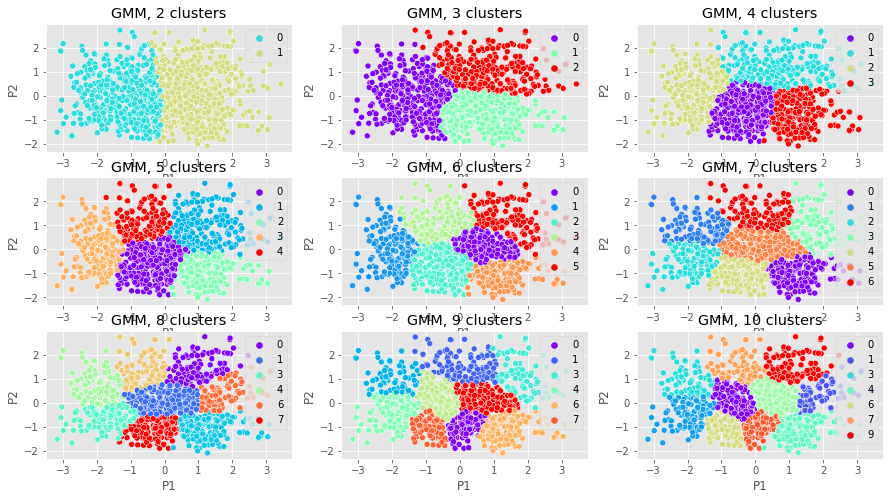

In [9]:
# Just like K-means, running GMM for 2-10 clusters to see how many clusters should we pick
n_cluster = [2,3,4,5,6,7,8,9,10]
fig = plt.figure(figsize = (15,8)) # create figure

sub_plots = []
for i in range(len(n_cluster)):
    sub_plots.append(fig.add_subplot(3,3,i+1))
    
for i in range(len(n_cluster)):
    GMM = GaussianMixture(n_components = n_cluster[i]).fit(df_pca)
    print(GMM.n_iter_) # *This number gives how many iteration of gaussian should be run for the model to converge
    sns.scatterplot(df_pca['P1'], df_pca['P2'], ax = sub_plots[i],
                hue = GaussianMixture(n_components = n_cluster[i]).fit_predict(df_pca) , palette='rainbow')
    sub_plots[i].set_title("GMM, {} clusters".format(n_cluster[i]))
plt.show()

**Number of iterations - Gaussian is not deterministic. 'n_iter_' tells how many times the model should be run so that it converges to the same conclusion/result. Here, the maximum is 9, hence we shall run the model for 10 iterations**

Evaluating the graphs-
For GMM with cluster numbers from 2,3; the graph looks generalize. The shape of each cluster is not the preferred spherical/eliptical shape.
For cluster numbers from 4-6, the clusters shape is eliptical. Each cluster seems well separated. This is an indication that the numbers of clusters within this range is appropriate.
For cluster numbers from 7-10, there is no significant benefit for increasing number of groups, because more clusters defeat the purpose of Clustering

Since we already know that the fitting procedure is not deterministic, we run ten fits for each number of clusters. Then we would consider the mean value and the standard deviation of the best five runs.

In [10]:
# Defining a function that returns the set of X configurations with shorter distance (Source: Kaggle)

def Select_Best(arr:list, X:int)->list:
    
    dx=np.argsort(arr)[:X]
    return arr[dx]

In [11]:
# This step involves running the model for 2-10 clusters, 10 times(iterations) & choosing the best 5 for each cluster
n_clusters=np.arange(2, 11)
sil_score=[]
sil_score_err=[]

iterations=10 # Number of iterations are set here
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init= 2).fit(df_pca)
        labels=gmm.predict(df_pca)
        
        # Calculating silhoutte score for each cluster
        sil = metrics.silhouette_score(df_pca, labels, metric='euclidean') 
        tmp_sil.append(sil)
    val=np.mean(Select_Best(np.array(tmp_sil), int(iterations/5)))
    err=np.std(tmp_sil)
    sil_score.append(val)
    sil_score_err.append(err)

Text(0, 0.5, 'Score')

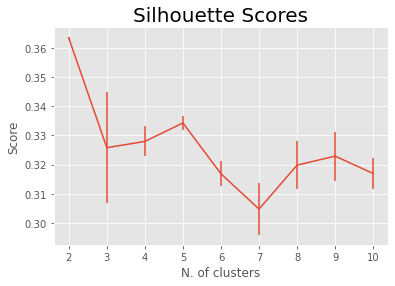

In [12]:
# Using errorbar to plot silhoutte score for each of the clusters
plt.errorbar(n_clusters, sil_score, yerr=sil_score_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")

Reference Project 1 - **Silhouette Coefficient:** A metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.
1 : Clusters are well apart from each other and clearly distinguished.
0 : Clusters are indifferent
-1: Clusters are assigned in the wrong way

Well, it turns out that we get the best score with four clusters (0.33). We shall also consider the next best score i.e. fifth cluster to decide how many clusters should ideally be taken.

Second score that should be considered for GMM and for deciding optimum number of clusters is - <br>
**Bayesian information criterion (BIC)** - This criterion gives us an estimation on how much good the GMM is in terms of predicting the data we actually have. Lower the BIC, the better is the model.


In [13]:
# Again fitting the model to get BIC scores. 
n_clusters=np.arange(2, 11)
bics=[]
bics_err=[]
iterations=20
for n in n_clusters:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(df_pca) 
        
        tmp_bic.append(gmm.bic(df_pca))
    val=np.mean(Select_Best(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)

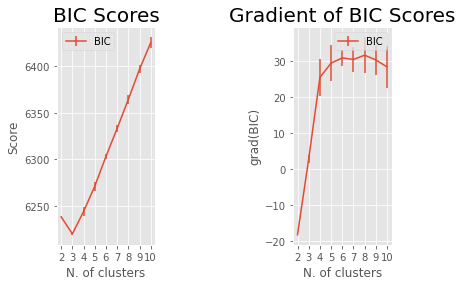

In [14]:
plt.subplot(1,3,1)
plt.errorbar(n_clusters,bics, yerr=bics_err, label='BIC')
plt.rcParams["figure.figsize"] = (10,5) 
#plt.figure(figsize=(5,10))
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.legend()

plt.subplot(1,3,3)
plt.errorbar(n_clusters, np.gradient(bics), yerr=bics_err, label='BIC')
plt.rcParams["figure.figsize"] = (10,5) 
plt.title("Gradient of BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("grad(BIC)")
plt.legend()

plt.show()

BIC score is minimum for 3 clusters but we can't consider it because
a) it wasn't giving us the best silhoutte score
b) The objective is create few profiles to direct marketing strategy of the bank. 

The next best BIC score is for 4 clusters. 
Also, to further assert that 4 should be the ideal number of clusters for GMM, we have plotted **gradient of BIC scores**. The magnitude of the gradient tells us how much the two values are different. The optimum number is given where the slope becomes constant. And we can see that increasing the clusters from 4 to 5 would not explain the data more.

In [15]:
# Taking 4 clusters anf finally fitting the mode to our dataset
GMM_df = GaussianMixture(n_components = 4, n_init = 2, max_iter = 10).fit(df_pca)

# Predicting the cluster number based on GMM
GMM_df.predict(df_pca)

array([3, 0, 3, 1, 1, 1, 1, 1, 3, 0, 2, 0, 2, 3, 2, 2, 1, 0, 1, 0, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 1, 2, 0, 0, 3, 2, 0, 0, 3, 3, 2, 0, 2, 1, 0,
       1, 3, 1, 2, 1, 2, 0, 0, 2, 0, 1, 2, 1, 0, 2, 0, 2, 3, 1, 0, 0, 1,
       2, 2, 1, 0, 0, 3, 3, 1, 1, 3, 0, 3, 1, 0, 1, 3, 2, 3, 3, 2, 2, 1,
       2, 2, 3, 3, 2, 0, 3, 1, 3, 2, 0, 1, 3, 0, 2, 3, 2, 1, 1, 0, 0, 2,
       2, 2, 0, 0, 2, 1, 0, 2, 0, 3, 2, 1, 2, 3, 2, 2, 3, 2, 2, 2, 0, 0,
       2, 3, 0, 3, 0, 3, 2, 3, 2, 0, 0, 2, 2, 0, 3, 3, 0, 3, 3, 3, 0, 0,
       1, 2, 3, 3, 1, 3, 0, 2, 3, 3, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 1,
       3, 3, 2, 3, 0, 0, 3, 1, 3, 2, 3, 3, 2, 0, 1, 0, 1, 2, 0, 2, 2, 2,
       1, 1, 3, 2, 0, 2, 3, 1, 3, 2, 0, 3, 2, 1, 1, 1, 1, 3, 0, 0, 0, 3,
       2, 2, 2, 0, 0, 0, 0, 1, 2, 0, 0, 3, 2, 2, 3, 2, 0, 1, 2, 1, 2, 3,
       0, 2, 2, 2, 3, 3, 0, 2, 3, 3, 0, 0, 2, 0, 0, 2, 0, 3, 2, 3, 1, 3,
       2, 3, 1, 2, 1, 2, 2, 3, 1, 0, 1, 2, 2, 3, 2, 2, 0, 3, 3, 3, 1, 1,
       0, 0, 3, 3, 2, 0, 1, 1, 1, 0, 2, 3, 3, 0, 3,

In [16]:
# This is to check if the data converged to uniform solution with 4 clusters and 10 iterations
GMM_df.converged_

True

In [17]:
df_out = df_in[:]
df_out['label'] = GMM_df.predict(df_pca)
df_out.head()

,Age,Amount,Duration,Gender_female,Purpose_Car(new),Purpose_Car(used),Purpose_business,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/television,Purpose_repairs,Purpose_retraining,label
0,2.271006,-0.933901,-1.864869,0,0,0,0,0,0,0,1,0,0,3
1,-1.446152,1.163046,1.708369,1,0,0,0,0,0,0,1,0,0,0
2,1.226696,-0.181559,-0.673790,0,0,0,0,0,1,0,0,0,0,3
3,0.942455,1.525148,1.478913,0,0,0,0,0,0,1,0,0,0,1
4,1.488620,0.904743,0.517289,0,1,0,0,0,0,0,0,0,0,1


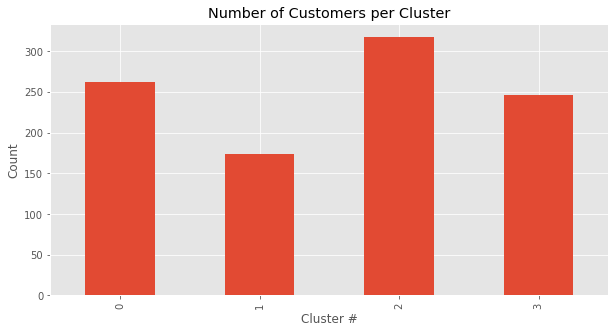

In [18]:
# Count number of customers for each cluster
n_count = df_out.groupby(["label"])['Age'].count()
n_count.plot(kind = 'bar')
plt.xlabel("Cluster #")
plt.ylabel("Count")
plt.title("Number of Customers per Cluster")
plt.show()

In [19]:
# Check - assign the label back to the original data to learn some charateristics.
# Change log variables of Age, Amount and Duration back to the original variables
df_out["Age"] = bank["Age"]
df_out['Amount'] = bank["Amount"]
df_out["Duration"] = bank["Duration"]

# Group by label and get the mean to learn some characteristics
grouped_df = df_out.groupby(['label']).mean().round(1)
grouped_df

,Age,Amount,Duration,Gender_female,Purpose_Car(new),Purpose_Car(used),Purpose_business,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/television,Purpose_repairs,Purpose_retraining
label,,,,,,,,,,,,,
0,28.1,5008.3,30.2,0.3,0.1,0.2,0.1,0.0,0.0,0.2,0.3,0.0,0.0
1,45.6,5866.0,31.4,0.1,0.2,0.2,0.2,0.0,0.0,0.1,0.1,0.0,0.0
2,27.6,1610.0,14.2,0.4,0.2,0.0,0.1,0.0,0.0,0.2,0.3,0.0,0.0
3,46.7,1733.5,12.3,0.2,0.3,0.0,0.0,0.0,0.1,0.1,0.3,0.0,0.0


# 2. Hierachical Clustering
Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom.Ex: all files and folders on the hard disk are organized in a hierarchy.There are two types of hierarchical clustering, Divisive and Agglomerative.
We will use agglomerative clustering primarily

In [20]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

<AxesSubplot:>

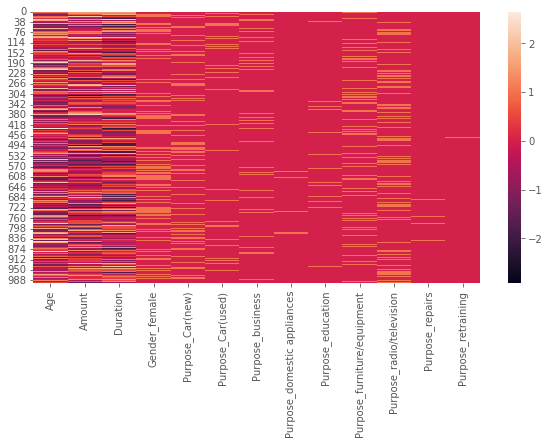

In [21]:
#Let us plot a heatmap to visuialize the data
sns.heatmap(df_in)

From the above heatmap we see a summary but the relation is not that clear.Let us start forming dendrogram

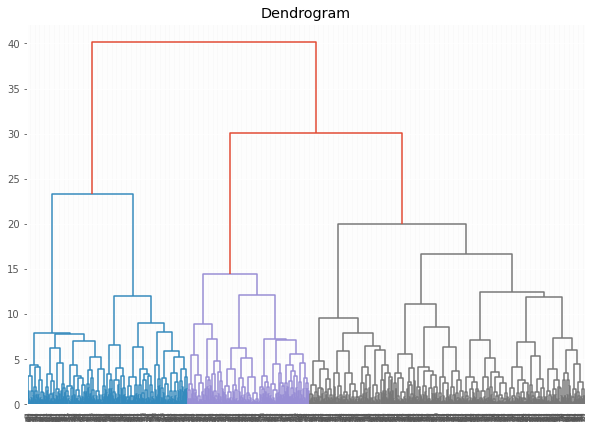

In [22]:
#Using the linkage method
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")

#input dataframe to plot the dendrogram
clusters = shc.linkage(df_in, 
            method='ward', 
            metric="euclidean")
#We use euclidian distance for linkage
shc.dendrogram(Z=clusters)
plt.show()

After forming dendrogram we have to check the minimum distance between vertical lines(i.e clusters).We try to find similarity between them and draw a horizontal line,From the above figure we see that the blue line slightly greater in length than the red one so we choose 22 to begin with .

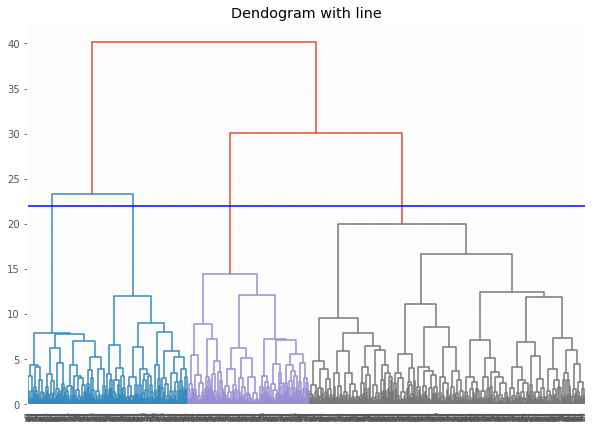

In [23]:
plt.figure(figsize=(10, 7))
plt.title("Dendogram with line")
clusters = shc.linkage(df_in, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y=22,color = 'b', linestyle = '-') #will cut through the tallest vertical line

From the above blue line we see that there should be 4 clusters.We will check for 5 first and then see how our plot looks like for 4 clusters. We should see better seperation for 4 clusters

In [24]:
#Let us check for 5 clusters
clustering_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
#We use agglomerative clustering and euclidian distance to fit our model and assign labels
labels = clustering_model.fit_predict(df_in)
print(labels)

[2 3 2 1 1 3 1 3 1 0 0 3 4 2 0 0 1 3 1 0 0 2 0 2 4 2 2 2 2 1 0 0 0 2 4 0 3
 2 2 2 0 4 1 3 1 0 0 4 0 4 0 3 4 0 1 2 1 3 0 3 4 2 1 3 0 1 4 4 0 0 3 2 2 3
 0 2 0 1 3 0 1 2 4 1 1 4 4 1 0 4 2 2 2 0 2 1 2 0 0 3 0 0 4 2 0 3 0 0 3 0 4
 4 0 3 2 1 3 4 0 0 0 1 4 2 4 0 2 4 0 0 3 3 0 1 3 2 3 2 2 2 2 3 0 0 0 3 2 2
 3 2 2 2 0 3 0 4 2 2 0 2 0 0 2 1 0 2 4 4 0 0 2 4 1 2 0 1 1 2 4 2 3 3 0 1 2
 2 1 2 4 1 1 3 0 2 0 2 4 4 0 1 2 4 3 4 0 1 1 4 3 2 2 1 1 1 1 2 0 0 0 2 2 4
 2 0 0 0 3 1 4 0 0 0 2 4 2 0 0 1 2 0 0 2 3 4 0 4 2 2 0 4 2 1 0 0 4 3 0 4 0
 2 4 2 0 2 4 2 3 2 0 4 0 4 3 0 3 2 0 1 2 0 0 1 2 1 0 3 3 3 2 2 4 3 1 1 1 3
 0 2 1 0 2 1 0 2 3 2 0 2 4 2 3 0 0 4 2 3 2 1 2 0 0 0 0 0 0 0 1 0 0 2 1 0 3
 3 0 2 4 4 0 2 3 0 0 0 0 2 4 0 4 2 4 4 0 0 2 0 1 0 2 0 2 2 0 4 0 0 0 0 1 1
 1 0 4 1 1 3 2 2 1 2 1 1 0 4 3 0 0 1 4 4 0 4 1 4 2 3 1 1 2 2 2 4 3 4 1 0 0
 4 0 4 0 3 0 0 0 3 0 3 0 0 0 0 2 0 0 0 0 2 4 1 1 3 2 0 4 4 2 0 1 4 0 4 0 2
 3 2 0 2 1 2 3 2 0 0 0 0 0 0 2 0 3 0 4 2 0 1 0 3 3 3 0 2 4 2 2 0 3 0 0 1 4
 0 1 4 2 2 1 1 0 0 4 3 4 

Text(0.5, 1.0, 'Labeled Data')

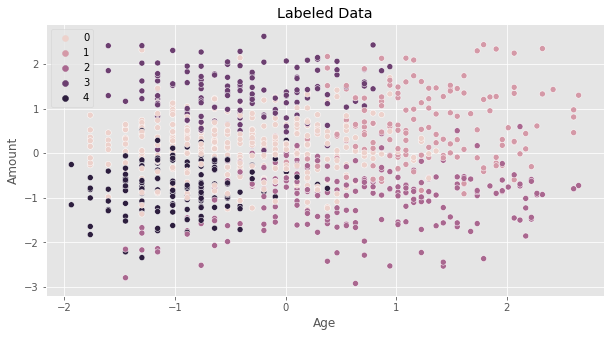

In [25]:
#Let us observe cluster for age vs amount
data_labels = clustering_model.labels_
sns.scatterplot(x='Age',
                y='Amount',
                data=df_in, 
                hue=labels).set_title('Labeled Data')

From the above data we see that the clusters overlap a bit. Let us repeat the agglomerative clustering and plot data for 4 clusters as we predicted from the Dendrogram

In [26]:
#lets use 4 clusters and check
clustering_model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
labels = clustering_model.fit_predict(df_in)
print(labels)

[2 3 2 1 1 3 1 3 1 0 0 3 0 2 0 0 1 3 1 0 0 2 0 2 0 2 2 2 2 1 0 0 0 2 0 0 3
 2 2 2 0 0 1 3 1 0 0 0 0 0 0 3 0 0 1 2 1 3 0 3 0 2 1 3 0 1 0 0 0 0 3 2 2 3
 0 2 0 1 3 0 1 2 0 1 1 0 0 1 0 0 2 2 2 0 2 1 2 0 0 3 0 0 0 2 0 3 0 0 3 0 0
 0 0 3 2 1 3 0 0 0 0 1 0 2 0 0 2 0 0 0 3 3 0 1 3 2 3 2 2 2 2 3 0 0 0 3 2 2
 3 2 2 2 0 3 0 0 2 2 0 2 0 0 2 1 0 2 0 0 0 0 2 0 1 2 0 1 1 2 0 2 3 3 0 1 2
 2 1 2 0 1 1 3 0 2 0 2 0 0 0 1 2 0 3 0 0 1 1 0 3 2 2 1 1 1 1 2 0 0 0 2 2 0
 2 0 0 0 3 1 0 0 0 0 2 0 2 0 0 1 2 0 0 2 3 0 0 0 2 2 0 0 2 1 0 0 0 3 0 0 0
 2 0 2 0 2 0 2 3 2 0 0 0 0 3 0 3 2 0 1 2 0 0 1 2 1 0 3 3 3 2 2 0 3 1 1 1 3
 0 2 1 0 2 1 0 2 3 2 0 2 0 2 3 0 0 0 2 3 2 1 2 0 0 0 0 0 0 0 1 0 0 2 1 0 3
 3 0 2 0 0 0 2 3 0 0 0 0 2 0 0 0 2 0 0 0 0 2 0 1 0 2 0 2 2 0 0 0 0 0 0 1 1
 1 0 0 1 1 3 2 2 1 2 1 1 0 0 3 0 0 1 0 0 0 0 1 0 2 3 1 1 2 2 2 0 3 0 1 0 0
 0 0 0 0 3 0 0 0 3 0 3 0 0 0 0 2 0 0 0 0 2 0 1 1 3 2 0 0 0 2 0 1 0 0 0 0 2
 3 2 0 2 1 2 3 2 0 0 0 0 0 0 2 0 3 0 0 2 0 1 0 3 3 3 0 2 0 2 2 0 3 0 0 1 0
 0 1 0 2 2 1 1 0 0 0 3 0 

Text(0.5, 1.0, 'Labeled Data')

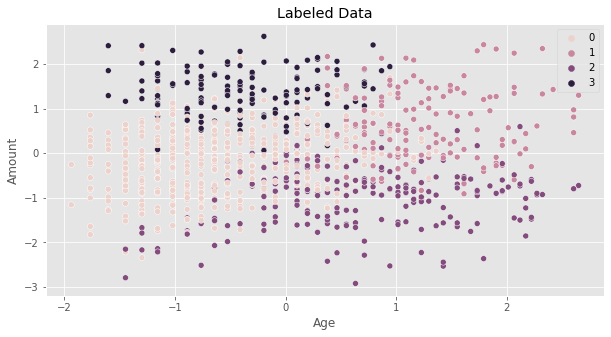

In [27]:
#Plotting for 4 clusters
data_labels = clustering_model.labels_
sns.scatterplot(x='Age',
                y='Amount',
                data=df_in, 
                hue=labels).set_title('Labeled Data')

Let us also see how the graph looks like for cluster =3

In [28]:
#lets use 3 clusters and check
clustering_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels = clustering_model.fit_predict(df_in)
print(labels)

[2 0 2 0 0 0 0 0 0 1 1 0 1 2 1 1 0 0 0 1 1 2 1 2 1 2 2 2 2 0 1 1 1 2 1 1 0
 2 2 2 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 2 0 0 1 0 1 2 0 0 1 0 1 1 1 1 0 2 2 0
 1 2 1 0 0 1 0 2 1 0 0 1 1 0 1 1 2 2 2 1 2 0 2 1 1 0 1 1 1 2 1 0 1 1 0 1 1
 1 1 0 2 0 0 1 1 1 1 0 1 2 1 1 2 1 1 1 0 0 1 0 0 2 0 2 2 2 2 0 1 1 1 0 2 2
 0 2 2 2 1 0 1 1 2 2 1 2 1 1 2 0 1 2 1 1 1 1 2 1 0 2 1 0 0 2 1 2 0 0 1 0 2
 2 0 2 1 0 0 0 1 2 1 2 1 1 1 0 2 1 0 1 1 0 0 1 0 2 2 0 0 0 0 2 1 1 1 2 2 1
 2 1 1 1 0 0 1 1 1 1 2 1 2 1 1 0 2 1 1 2 0 1 1 1 2 2 1 1 2 0 1 1 1 0 1 1 1
 2 1 2 1 2 1 2 0 2 1 1 1 1 0 1 0 2 1 0 2 1 1 0 2 0 1 0 0 0 2 2 1 0 0 0 0 0
 1 2 0 1 2 0 1 2 0 2 1 2 1 2 0 1 1 1 2 0 2 0 2 1 1 1 1 1 1 1 0 1 1 2 0 1 0
 0 1 2 1 1 1 2 0 1 1 1 1 2 1 1 1 2 1 1 1 1 2 1 0 1 2 1 2 2 1 1 1 1 1 1 0 0
 0 1 1 0 0 0 2 2 0 2 0 0 1 1 0 1 1 0 1 1 1 1 0 1 2 0 0 0 2 2 2 1 0 1 0 1 1
 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 2 1 1 1 1 2 1 0 0 0 2 1 1 1 2 1 0 1 1 1 1 2
 0 2 1 2 0 2 0 2 1 1 1 1 1 1 2 1 0 1 1 2 1 0 1 0 0 0 1 2 1 2 2 1 0 1 1 0 1
 1 0 1 2 2 0 0 1 1 1 0 1 

Text(0.5, 1.0, 'Labeled Data')

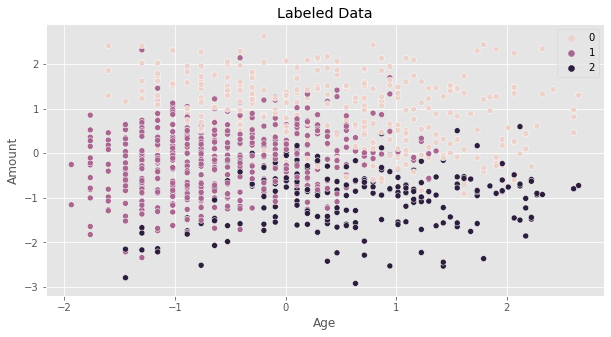

In [29]:
#Plotting for 4 clusters
data_labels = clustering_model.labels_
sns.scatterplot(x='Age',
                y='Amount',
                data=df_in, 
                hue=labels).set_title('Labeled Data')

It looks a bit more overlapped than cluster 4

In [30]:
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import silhouette_samples, silhouette_score

X=df_in
clusterer = AgglomerativeClustering(n_clusters=4, linkage='ward')
y_predict = clusterer.fit_predict(X)
cluster_labels = clusterer.labels_

clf = NearestCentroid()
clf.fit(X, y_predict)
print("Centroids:")
print(clf.centroids_)

silhouette_avg = silhouette_score(X, cluster_labels)
print("silhoutte score for 4 cluster is",silhouette_avg)

Centroids:
[[-0.5557025  -0.15456236 -0.086721    0.37246964  0.29149798  0.07287449
   0.10323887  0.01012146  0.02834008  0.20040486  0.26518219  0.02024291
   0.00607287]
 [ 1.25254088  0.64898796  0.49239063  0.21917808  0.17123288  0.17808219
   0.08219178  0.00684932  0.02739726  0.31506849  0.16438356  0.04109589
   0.        ]
 [ 0.66469188 -0.95509097 -0.95964121  0.25688073  0.21559633  0.03211009
   0.00458716  0.02293578  0.10550459  0.06422018  0.49541284  0.02293578
   0.02752294]
 [-0.37504762  1.33669996  1.26868259  0.26760563  0.12676056  0.23943662
   0.23239437  0.00704225  0.06338028  0.15492958  0.11971831  0.00704225
   0.        ]]
silhoutte score for 4 cluster is 0.1295330455412251


In [31]:
X=df_in
clusterer = AgglomerativeClustering(n_clusters=5, linkage='ward')
y_predict = clusterer.fit_predict(X)
cluster_labels = clusterer.labels_

clf = NearestCentroid()
clf.fit(X, y_predict)
print("Centroids:")
print(clf.centroids_)

silhouette_avg = silhouette_score(X, cluster_labels)
print("silhoutte score for 5 cluster is",silhouette_avg)

Centroids:
[[-0.38187605  0.11375067  0.16504812  0.33430233  0.36918605  0.10174419
   0.0872093   0.          0.03197674  0.1627907   0.23255814  0.00872093
   0.00290698]
 [ 1.25254088  0.64898796  0.49239063  0.21917808  0.17123288  0.17808219
   0.08219178  0.00684932  0.02739726  0.31506849  0.16438356  0.04109589
   0.        ]
 [ 0.66469188 -0.95509097 -0.95964121  0.25688073  0.21559633  0.03211009
   0.00458716  0.02293578  0.10550459  0.06422018  0.49541284  0.02293578
   0.02752294]
 [-0.37504762  1.33669996  1.26868259  0.26760563  0.12676056  0.23943662
   0.23239437  0.00704225  0.06338028  0.15492958  0.11971831  0.00704225
   0.        ]
 [-0.9543445  -0.76989357 -0.66411153  0.46        0.11333333  0.00666667
   0.14        0.03333333  0.02        0.28666667  0.34        0.04666667
   0.01333333]]
silhoutte score for 5 cluster is 0.10447810066478133


From silhoutte score also we come to the conclusion that 4 cluster is better

we observe that clusters are more well defined in case of 4 which we originally predicted. So by using Hierarchical clustering we can conclude that the model performs best with 4 clusters

# 4. DBSCAN 

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [33]:
#import dataset
data= pd.read_excel('Clustering_Bank.xlsx')

In [34]:
#normalize the data
sc=StandardScaler()
sc.fit(data)                              
X=sc.transform(data)
data=pd.DataFrame(X,columns=['Age', 'Amount', 'Duration', 'Gender_female', 'Purpose_Car(new)',
                              'Purpose_Car(used)', 'Purpose_business', 
                              'Purpose_domestic appliances','Purpose_education',
                              'Purpose_furniture/equipment','Purpose_radio/television',
                              'Purpose_repairs', 'Purpose_retraining'])

In [35]:
# using loops to find the parameter combination with the highest silhouette score
res=[]
for i_eps in np.arange(1,4.8,0.1):
    for i_samplenum in range(2,26):
        try:
            db1=DBSCAN(eps=i_eps,min_samples=i_samplenum,metric='euclidean',algorithm='auto').fit(data)
            np.unique(db1.labels_) 
            n_clusters=len([i for i in set(db1.labels_) if i != -1])
            noise=np.sum(np.where(db1.labels_== -1, 1, 0))
            stats=str(pd.Series([i for i in db1.labels_ if i != -1]).value_counts().values)
            data['assignments']=db1.labels_
            #calculate silhouette score
            sil_score=silhouette_score(data.iloc[:,:-1],data[['assignments']])   
            res.append({'eps':i_eps,'min_samples':i_samplenum,'n_clusters':n_clusters,
                        'noise':noise,'stats':stats,'silhouette score':sil_score})
            data=data.drop(columns=['assignments'])
        except Exception:
            res.append({'eps':i_eps,'min_samples':i_samplenum,'n_clusters':np.nan,
                        'noise':np.nan,'stats':np.nan,'silhouette score':np.nan})
            try:
                data=data.drop(columns=['assignments'])
            except Exception:
                pass
df=pd.DataFrame(res)      
df=df.loc[df.n_clusters>1] 

In [36]:
df.sort_values(by=['silhouette score'],ascending=False).head(1)

,eps,min_samples,n_clusters,noise,stats,silhouette score
896,4.7,10,3,9,[957 22 12],0.461791


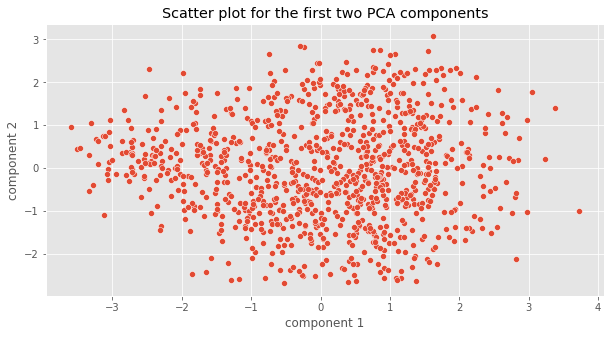

In [37]:
#using the first 2 principal components to show the data pattern
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(data)
df_pca
import seaborn as sns
#fig = plt.figure(figsize = (12,8))
plt.title('Scatter plot for the first two PCA components')
plt.xlabel('component 1')
plt.ylabel('component 2')
sns.scatterplot(x = df_pca[:,0], y = df_pca[:,1])
plt.show()

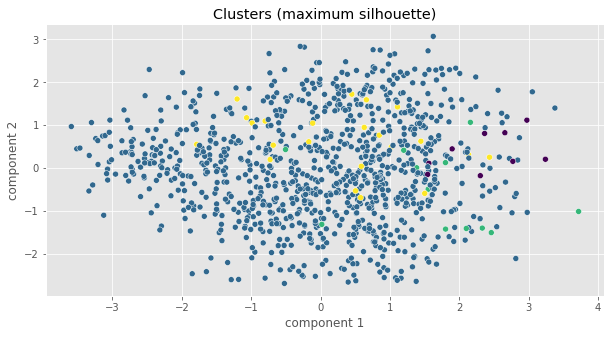

In [38]:
#after applying DBSCAN, using the first 2 principal components to show the clusters 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(data)
df_pca
import seaborn as sns
import matplotlib.pyplot as plt
db=DBSCAN(eps=4.7,min_samples=10,metric='euclidean',algorithm='auto').fit(data)
#fig = plt.figure(figsize = (12,8))
plt.title('Clusters (maximum silhouette)')
plt.xlabel('component 1')
plt.ylabel('component 2')
sns.scatterplot(x = df_pca[:,0], y = df_pca[:,1],c=db.labels_)
plt.show()